In [0]:
import numpy as np
import random
from random import seed
from random import randrange
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

seed(12)

iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # check only if it's an Iris-Setosa (1), or no (0)

Text(0,0.5,'Petal Width')

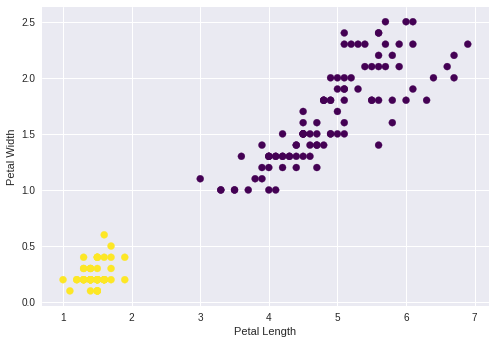

In [380]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

In [0]:
'''
The scatterplot shows an evident space for a choice boundary
We have to assemble a training data set
'''
training_data = np.insert(X, len(X[0]), y, axis=1)

In [0]:
def predict(row, weights):
  activation = weights[0]
  for i in range(len(row)-1):
    activation += weights[i+1]*row[i]
  return 1.0 if (activation >= 0) else 0.0

In [0]:
def train(data, eta=0.1, n=20):
  w = [0.0 for i in range(len(data[0]))]
  errors = []
  for epoch in range(n):
    sum_error = 0
    for row in data:
      prediction = predictv2(row, w)
      error = row[-1] - prediction
      w[0] += eta * error
      for i in range(len(row)-1):
        w[i+1] += eta * error * row[i]
        
      sum_error += error**2
    errors.append(sum_error)
   
  return w, errors

In [0]:
#Running training algorithm
weights, errors = train(training_data)

Text(0,0.5,'Error')

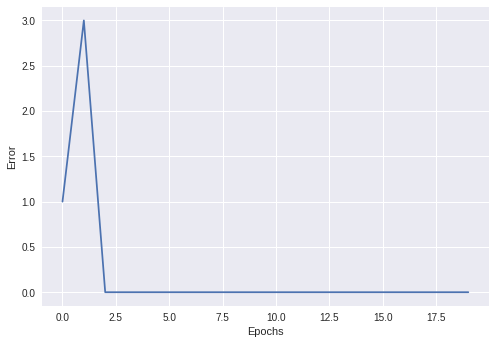

In [387]:
#Error Plot shows early convergence
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")

In [388]:
#Final Weights vector
weights

[0.2, -0.06000000000000008, -0.07999999999999997]

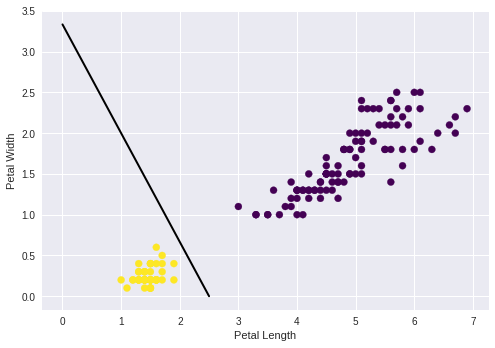

In [389]:
#we now come back to the scatterplot and apply the weights vector to plot the decision boundary
plt.plot([0,-weights[0]/weights[2]], [-weights[0]/weights[1], 0], 'k-', lw=2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [0]:
#Now let's run the test with sklearn
clf = Perceptron()
clf.fit(X, y)
func = clf.decision_function(X)


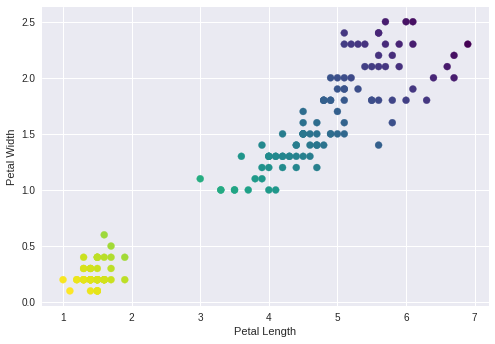

In [391]:
#Sklearn provides a superior model with non-binary classifiers giving their proximity to the boundary
plt.scatter(X[:,0], X[:,1], c=func, cmap='viridis')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [0]:
#An accuracy metric
def accuracy(predicted, actual):
  correct = 0
  for i in range(len(predicted)):
    if predicted[i] == actual[i]:
      correct += 1
  return (correct/float(len(predicted)))*100

In [393]:
#This means we will once more train the model, this time providing only partial input
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Mashing x and y together for the train and test sets
training_data = np.insert(X_train, len(X_train[0]), y_train, axis=1)
testing_data = np.insert(X_test, len(X_test[0]), y_test, axis=1)

#we randomize initial weights and run the training algorithm
weights, errors = train(training_data)

print(weights)

[0.4, -0.09, -0.18999999999999995]


In [0]:
#We now run a prediction of the test data
predicted = []
for i in range(len(X_test)):
  predicted.append(predict(testing_data[i], weights))


Accuracy: 100.0 %


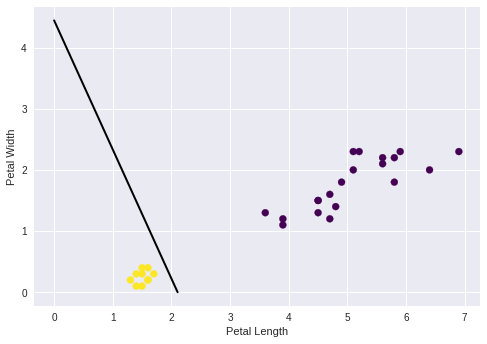

In [395]:
print("Accuracy:", accuracy(predicted, y_test), "%")

#A scatterplot showing predicted labels for tested samples
plt.plot([0,-weights[0]/weights[2]], [-weights[0]/weights[1], 0], 'k-', lw=2)
plt.scatter(X_test[:,0], X_test[:,1], c=predicted, cmap='viridis')

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [0]:
'''
Given the binary nature of the problem and relatively contained label clusters,
this model is efficient enough to hit 100% accuracy.
We can observe different weight vectors however, which indicates that for less trivial
datasets, the error rate would shoot up accordingly.
'''